In [140]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

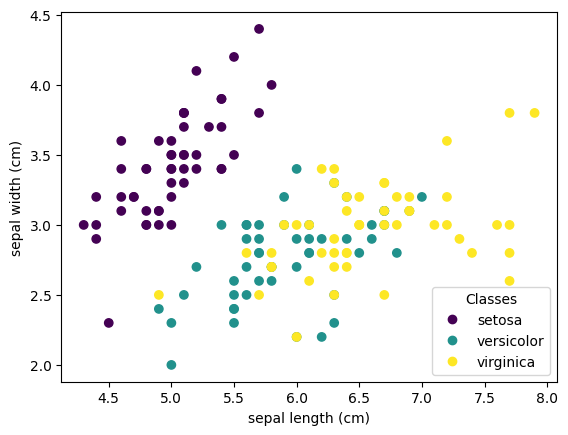

In [141]:
iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


In [185]:
iris.data = (iris.data-iris.data.mean())/iris.data.std()
iris.data

array([[-0.86318277,  0.67198513, -1.45176847, -1.55136148],
       [-1.07493006, -0.12206723, -1.45176847, -1.55136148],
       [-1.28667736,  0.19555371, -1.51636934, -1.55136148],
       [-1.392551  ,  0.03674324, -1.3871676 , -1.55136148],
       [-0.96905641,  0.8307956 , -1.45176847, -1.55136148],
       [-0.54556182,  1.30722701, -1.25796586, -1.23374053],
       [-1.392551  ,  0.51317466, -1.45176847, -1.392551  ],
       [-0.96905641,  0.51317466, -1.3871676 , -1.55136148],
       [-1.6042983 , -0.2808777 , -1.45176847, -1.55136148],
       [-1.07493006,  0.03674324, -1.3871676 , -1.71017195],
       [-0.54556182,  0.98960607, -1.3871676 , -1.55136148],
       [-1.18080371,  0.51317466, -1.32256673, -1.55136148],
       [-1.18080371, -0.12206723, -1.45176847, -1.71017195],
       [-1.71017195, -0.12206723, -1.64557108, -1.71017195],
       [-0.12206723,  1.46603749, -1.58097021, -1.55136148],
       [-0.22794088,  2.10127937, -1.3871676 , -1.23374053],
       [-0.54556182,  1.

In [186]:
def obtain_means(array, ran_means):
    means = []
    for i in range(len(array)):
        if array[i] == []:
            means.append(ran_means[i])
        else: 
            mean = np.mean(array[i], 0)
            means.append(mean)

    return means

In [187]:
def step(dataset, ran_means):
    k_means = len(ran_means)
    no_features = len(ran_means[0])
    classified_samples = [[] for i in range(k_means)]

    for i in range(len(dataset)):
        distances = []
        for j in range(k_means):
            distance = 0
            for k in range(no_features):
                distance += (ran_means[j][k] - dataset[i][k])**2
            distances.append(distance)
        classified_samples[np.argmin(distances)].append(dataset[i])

    return obtain_means(classified_samples, ran_means)

[[0.355 0.517]
 [0.892 0.213]
 [0.291 0.307]]
[array([-0.45145191,  1.12194813]), array([ 1.03989605, -0.08236461]), array([-0.4880218 , -0.23427028])]
[array([-0.75400057,  0.90027518]), array([ 0.88672885, -0.08611014]), array([-0.52764474, -0.44457465])]
[array([-0.83332097,  0.78193084]), array([ 0.84781101, -0.07669281]), array([-0.48011266, -0.56096163])]
[array([-0.92333825,  0.67920378]), array([ 0.83451046, -0.06634426]), array([-0.37486757, -0.62766792])]
[array([-0.95141081,  0.60912265]), array([ 0.8461954 , -0.02678095]), array([-0.26173034, -0.68973019])]
[array([-0.95177092,  0.59420041]), array([ 0.86475507, -0.00820312]), array([-0.22132378, -0.69444664])]
[array([-0.95177092,  0.59420041]), array([ 0.86475507, -0.00820312]), array([-0.22132378, -0.69444664])]
[array([-0.95177092,  0.59420041]), array([ 0.86475507, -0.00820312]), array([-0.22132378, -0.69444664])]
[array([-0.95177092,  0.59420041]), array([ 0.86475507, -0.00820312]), array([-0.22132378, -0.69444664])]


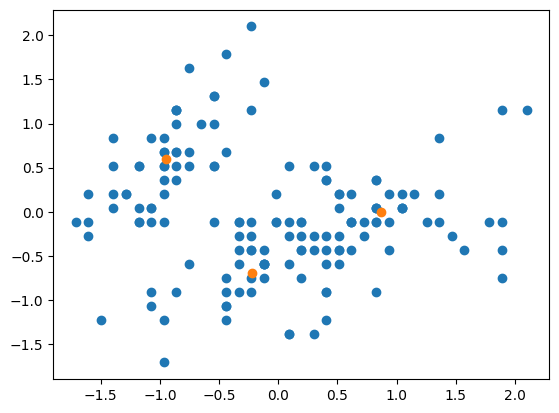

In [190]:
k_means = 3
no_features = 2

dataset = iris.data[:,0:2]
means = np.random.randint(0, 1000, size=(k_means, no_features))/1000

print(means)

for _ in range(10):
    means = step(dataset, means)
    print(means)

means = np.array(means)
print(means)

dataset = np.array(dataset)
fig = plt.figure()
plt.scatter(dataset[:,0],dataset[:,1])
plt.scatter(means[:,0],means[:,1])

In [147]:
tickers = [
    # 🔴 Cripto y acciones muy volátiles (riesgo alto)
    "BTC-USD", "ETH-USD", "DOGE-USD", "SOL-USD", "ADA-USD", "COIN", "MARA", "RIOT", "HIVE", "HUDI",
    "SPCE", "GME", "AMC", "UPST", "AFRM", "SOFI", "LCID", "RIVN", "NKLA", "BBBY",

    # 🟠 Acciones de crecimiento / alto riesgo (tech emergente, AI, biotech)
    "PLTR", "SNOW", "DDOG", "CRWD", "ZS", "NET", "FSLY", "U", "DOCN", "ZI",
    "AI", "PATH", "NVTA", "BEAM", "CRSP", "EDIT", "VERV", "BFLY", "BIRD", "BIGC",

    # 🟡 Mid caps / riesgo medio (con más estabilidad)
    "TSLA", "RBLX", "ABNB", "SQ", "PYPL", "SHOP", "TWLO", "ROKU", "W", "TOST",
    "ALGN", "FVRR", "ETSY", "BIDU", "IQ", "YNDX", "NTLA", "PACB", "NVCR", "SDGR",

    # 🔵 Blue Chips / bajo riesgo
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "JPM", "V", "MA", "JNJ",
    "PG", "KO", "PEP", "UNH", "MCD", "HD", "LOW", "WMT", "COST", "INTC",

    # 🟢 ETFs de índices (riesgo bajo a medio)
    "SPY", "VOO", "QQQ", "VTI", "DIA", "IWM", "VEA", "VWO", "EFA", "VT",
    "IVV", "IJH", "IJR", "XLF", "XLV", "XLE", "XLI", "XLY", "XLK", "XLU",

    # 🟢 ETFs de bonos y renta fija (muy conservadores)
    "BND", "AGG", "TLT", "IEF", "SHY", "VGIT", "GOVT", "MBB", "TIP", "VMBS",
    "LQD", "HYG", "VCSH", "VCIT", "VCLT", "BSV", "BIV", "BNDX", "IGSB", "GOVZ",

    # 🟢 Bonos y futuros (aún más conservadores)
    "ZC=F", "ZN=F", "ZB=F", "UB=F", "FV=F", "VMEX.MX", "ISHG", "SPSB", "SPTL", "SPAB",

    # 🟠 Finanzas y bancos
    "BAC", "WFC", "C", "GS", "MS", "USB", "TFC", "PNC", "BK", "SCHW",
    "AXP", "BLK", "TROW", "AIG", "ALL", "MET", "PRU", "CME", "ICE", "NDAQ",

    # 🟡 Energía y petróleo
    "XOM", "CVX", "COP", "EOG", "PSX", "MPC", "VLO", "HES", "SLB", "HAL",
    "OXY", "DVN", "FANG", "PXD", "BKR", "KMI", "WMB", "ENB", "TRP", "ET",

    # 🟢 Consumo básico / defensivo
    "MO", "PM", "CL", "KMB", "GIS", "HSY", "SJM", "CAG", "HRL", "CPB",
    "TSN", "KHC", "MDLZ", "KR", "WBA", "EL", "CHD", "PG", "DGE.L", "NESN.SW",

    # 🟠 Real estate y REITs
    "VNQ", "O", "SPG", "PLD", "AMT", "CCI", "DLR", "EQIX", "WELL", "AVB",
    "MAA", "EQR", "ESS", "UDR", "VTR", "HST", "PEAK", "ARE", "FRT", "BXP"
]

len(tickers)

210

In [148]:
import yfinance as yf

# Descargar precios de cierre (Close) del último año
data = yf.download(tickers, start="2023-06-01", end="2024-06-01")["Close"]

# Guardar como CSV
data.to_csv("precios_cierre.csv")

[**********************45%                       ]  95 of 209 completedFailed to get ticker 'VT' reason: Failed to perform, curl: (35) Recv failure: Connection reset by peer. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  209 of 209 completed

11 Failed downloads:
['YNDX', 'BBBY', 'VT', 'NKLA', 'VMEX.MX', 'SQ', 'PXD', 'PEAK', 'NVTA']: YFTzMissingError('possibly delisted; no timezone found')
['FV=F']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-06-01 -> 2024-06-01)')
['COIN']: SSLError('Failed to perform, curl: (35) Recv failure: Connection reset by peer. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


In [162]:
import pandas as pd
df = pd.read_csv("precios_cierre.csv")
df_clean = df.ffill()
df_clean.columns

Index(['Date', 'AAPL', 'ABNB', 'ADA-USD', 'AFRM', 'AGG', 'AI', 'AIG', 'ALGN',
       'ALL',
       ...
       'XLU', 'XLV', 'XLY', 'XOM', 'YNDX', 'ZB=F', 'ZC=F', 'ZI', 'ZN=F', 'ZS'],
      dtype='object', length=210)

In [204]:
def sharpe_ratio(timeseries):
    returns = np.diff(timeseries) / timeseries[:-1]  # Daily returns
    average_return = np.mean(returns)
    std_return = np.std(returns)

    if std_return == 0:
        return 0  # Para evitar división entre 0

    sharpe = average_return / std_return
    return sharpe

In [205]:
def cagr(timeseries):
    n = timeseries.size
    return (timeseries[n-1] / timeseries[0])**(1/n) - 1

In [206]:
def calc_sharpe_cagr(dataframe):
    result = []
    sharpe_ratios = []
    cagrs = []
    for i in range(1, dataframe.columns.size):
        column = dataframe.iloc[:, i]
        sharpe_ratios.append(sharpe_ratio(column))
        cagrs.append(cagr(column))
    result.append(dataframe.columns[1:])
    result.append(sharpe_ratios)
    result.append(cagrs)
    return np.array(result).T
    

In [207]:
sharpe_cagr_df = pd.DataFrame(calc_sharpe_cagr(df_clean), columns=["Ticker", "Sharpe", "CAGR"])
sharpe_cagr_df.to_csv("sharpe_cagr.csv")
values = sharpe_cagr_df.iloc[:, 1:3]

normalized_df=(values-values.mean())/values.std()
normalized_df


,Sharpe,CAGR
0,-0.23115,0.048904
1,0.258247,0.483374
2,-0.036428,0.361973
3,0.58215,1.515142
4,-0.509848,-0.09287
...,...,...
204,-1.491221,-0.35859
205,-1.4806,-0.779026
206,-1.706709,-1.860777
207,-1.415302,-0.230687


[[0.412 0.746]
 [0.361 0.181]
 [0.335 0.56 ]
 [0.077 0.311]
 [0.792 0.939]
 [0.773 0.914]
 [0.215 0.273]
 [0.629 0.226]
 [0.703 0.573]
 [0.373 0.672]]
[array([np.float64(nan), np.float64(nan)], dtype=object), array([np.float64(0.11921989646604786), np.float64(-0.42459897182640444)],
      dtype=object), array([np.float64(0.28945097161097105), np.float64(0.4938550916983251)],
      dtype=object), array([np.float64(-0.7674892254022183), np.float64(-0.497982731285443)],
      dtype=object), array([np.float64(1.423594645876426), np.float64(1.1968140761806627)],
      dtype=object), array([np.float64(0.8694932951837702), np.float64(0.7399619067762471)],
      dtype=object), array([np.float64(0.23069579622940561), np.float64(0.2680136372856933)],
      dtype=object), array([np.float64(0.8270867282767981), np.float64(0.19510482293604148)],
      dtype=object), array([np.float64(1.0628100544578678), np.float64(0.5111060600628524)],
      dtype=object), array([0.373, 0.672])]
[array([np.float64

Text(0, 0.5, 'CAGR')

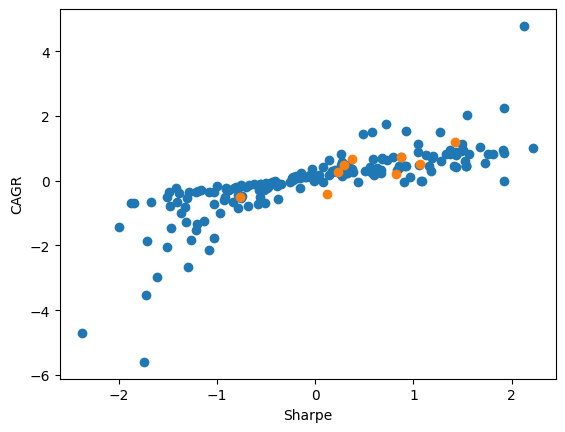

In [249]:
means = np.random.randint(0, 1000, size=(10, no_features))/1000

print(means)

for _ in range(10):
    means = step(normalized_df.values, means)
    print(means)

means = np.array(means)
print(means)

plt.scatter(normalized_df['Sharpe'], normalized_df["CAGR"])
plt.scatter(means[:,0],means[:,1])
plt.xlabel("Sharpe")
plt.ylabel("CAGR")